In [3]:
import numpy as np
import pandas as pd
from copy import copy

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### reading data

In [5]:
df = pd.read_csv('profiles.csv')

In [11]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
age            59946 non-null int64
body_type      54650 non-null object
diet           35551 non-null object
drinks         56961 non-null object
drugs          45866 non-null object
education      53318 non-null object
essay0         54461 non-null object
essay1         52375 non-null object
essay2         50308 non-null object
essay3         48470 non-null object
essay4         49409 non-null object
essay5         49099 non-null object
essay6         46175 non-null object
essay7         47496 non-null object
essay8         40732 non-null object
essay9         47344 non-null object
ethnicity      54266 non-null object
height         59943 non-null float64
income         59946 non-null int64
job            51748 non-null object
last_online    59946 non-null object
location       59946 non-null object
offspring      24385 non-null object
orientation    59946 non-null object
pets

### Throwing away people with nan values in education

In [13]:
df_edu_notNan= df[pd.notnull((df['education']))]

### Extracting data of the education program(e.g. high school) and the state (e.g. graduated..) of each person 

In [14]:
def edu_state(edu):
    edu = edu.split()
    if 'dropped' in edu:
        state = copy(edu[0:3])
    else:
        state = copy(edu[0:2])
    return ' '.join(state) 
    
def edu_program(edu):
    edu = edu.split()
    if 'dropped' in edu:
        program = copy(edu[3:])
    else:
        program = copy(edu[2:])
    return ' '.join(program) 


In [15]:
df_edu_notNan['edu_state'] = df_edu_notNan['education'].apply(edu_state)
df_edu_notNan['edu_program'] = df_edu_notNan['education'].apply(edu_program)

C:\Users\davidna2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\davidna2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [16]:
# plt.figure(figsize=(15, 6))
# sns.countplot(x='edu_program',data=df_edu_notNan,hue='drugs',palette='viridis')

###  A graph showing for each education program, the drug habits in precentage

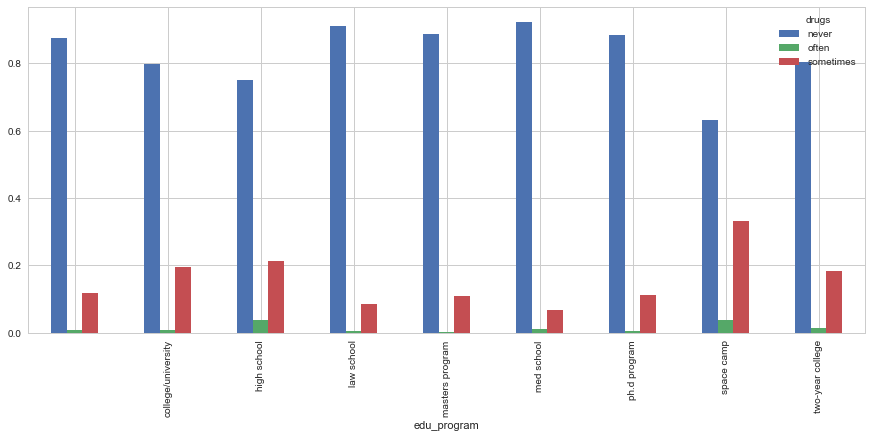

In [17]:
df_edu_prog =  df_edu_notNan.groupby(by='edu_program')['drugs'].value_counts(normalize=True)
# df_edu_prog.reset_index()
df_edu_prog.head()
plt.figure(figsize=(15, 6))
df_edu_prog.unstack().plot(kind='bar',figsize=(15, 6))

# sns.barplot(x='edu_program',data=df_edu_prog,hue='drugs',palette='viridis')


### A graph showing income statistics for job - splited by sex. These several variations of the same graph, for reading convience

In [ ]:
df_income = df[df['income']!=-1]

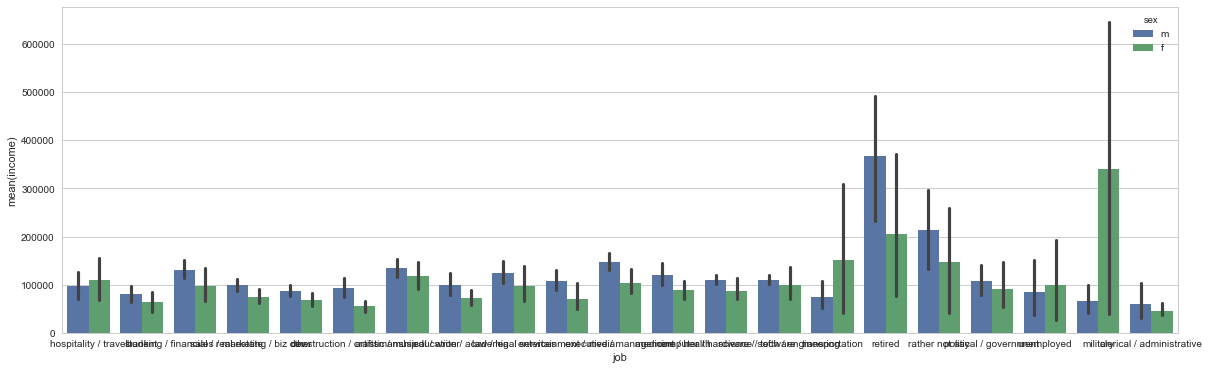

In [19]:
plt.figure(figsize=(20, 6))
sns.barplot(x='job', y='income',hue='sex',data=df_income)

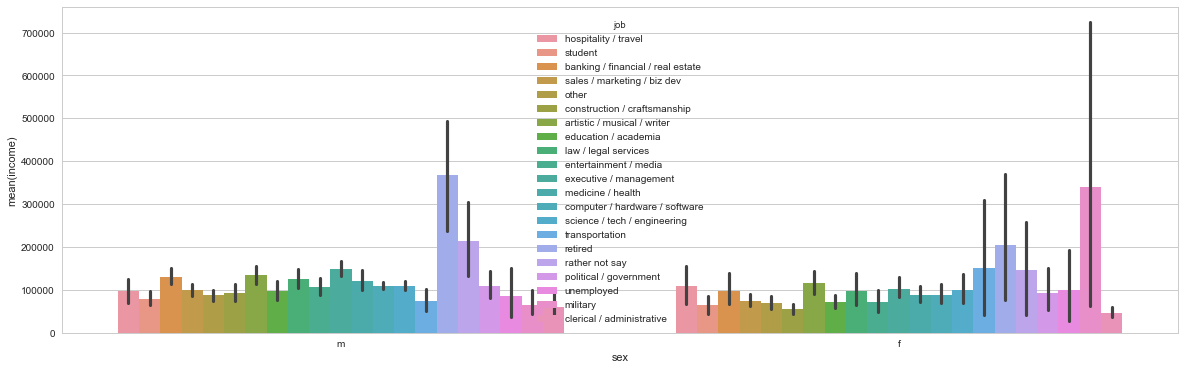

In [20]:
plt.figure(figsize=(20, 6))
sns.barplot(x='sex', y='income',hue='job',data=df_income)

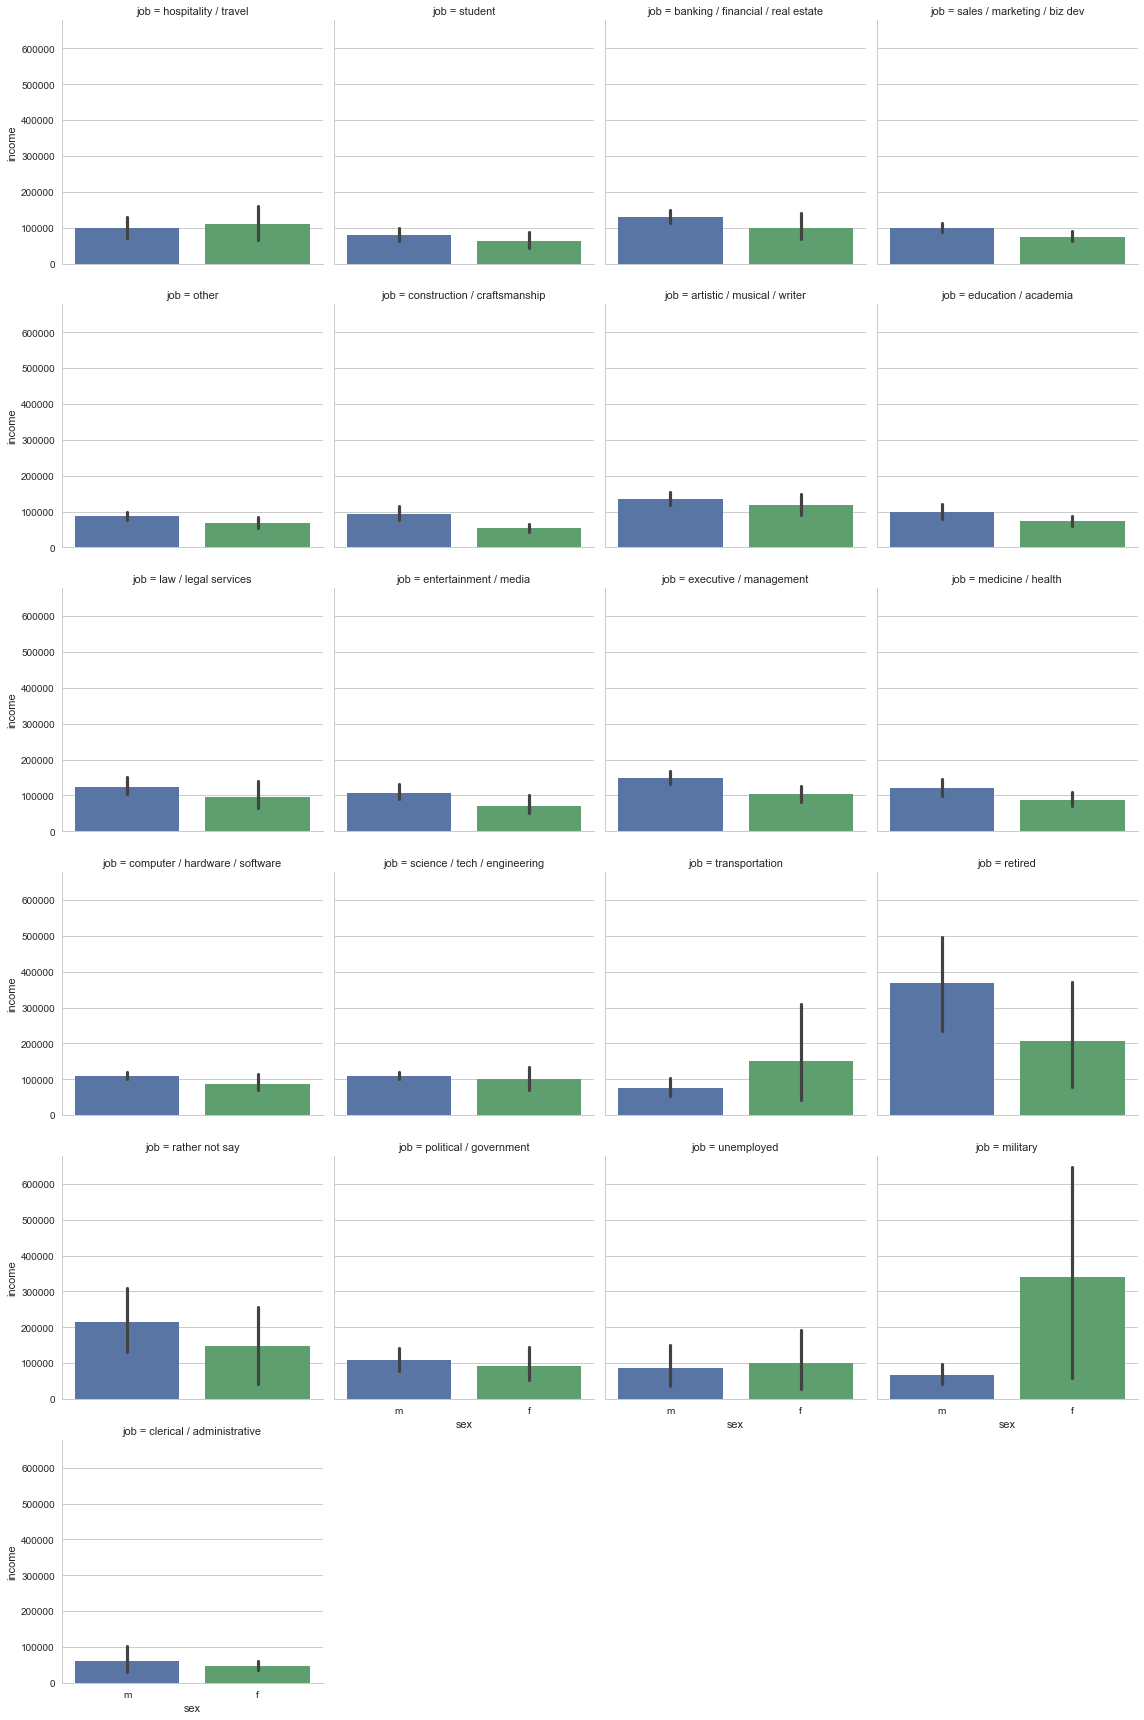

In [21]:
plt.figure(figsize=(15, 6))
sns.factorplot(x='sex',y='income',col='job',col_wrap=4,data=df_income,kind='bar')

### A graph showing age distribution for each sex 

C:\Users\davidna2\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


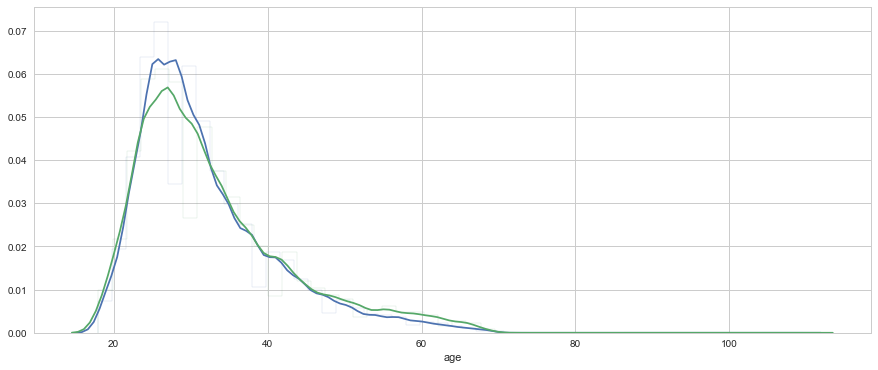

In [22]:
plt.figure(figsize=(15, 6))
sns.distplot(df[df['sex']=='m']['age'],hist_kws={'histtype':'step'})
sns.distplot(df[df['sex']=='f']['age'],hist_kws={'histtype':'step'})

### A graph showing orientaion statistics for each ethnics group

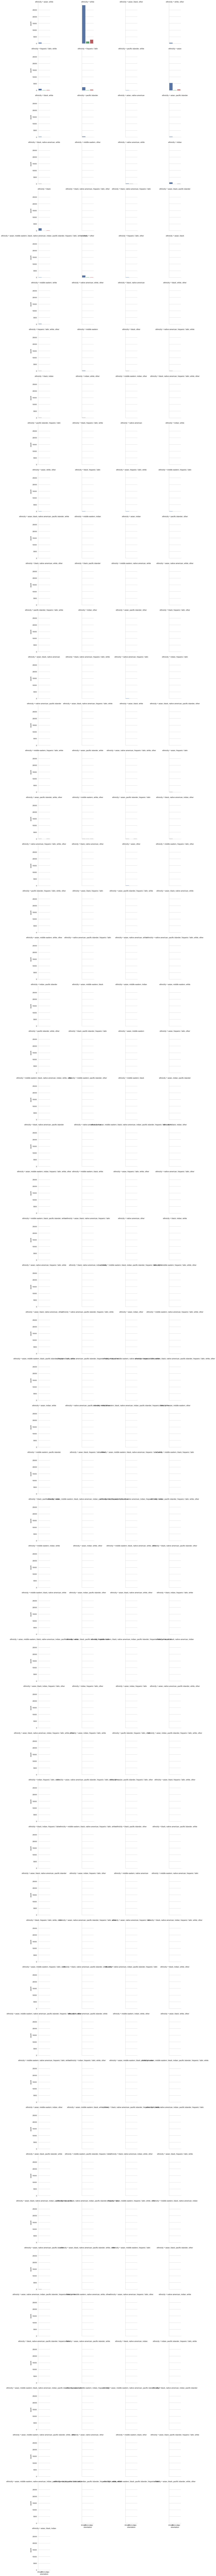

In [23]:
# plt.figure(figsize=(3, 3))
# # sns.countplot(x='ethnicity',data=df,hue='orientation',palette='viridis')
sns.factorplot(x='orientation',col='ethnicity',col_wrap=4,data=df,kind='count')

In [25]:
# def throw_comma(x):
#     if x[-1]==',':
#         x=x[:-1]
#     return x

df['first_ethn'] = df['ethnicity'].apply(lambda x: str(x).split(',')[0] )
# df['first_ethn'] = df['first_ethn'].apply(throw_comma)
df.head()
# df[df['first_ethn']=='asian'].head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,first_ethn
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,asian
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,white
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,nan
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,white
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,asian


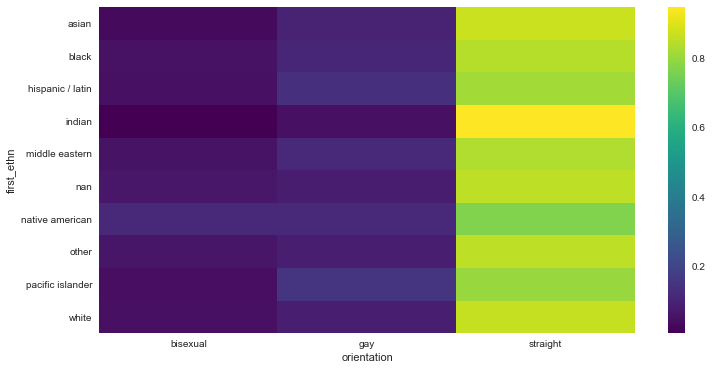

In [26]:
df_ethn_orient =  df.groupby(by='first_ethn')['orientation'].value_counts(normalize=True)
df_ethn_orient.unstack().head()
plt.figure(figsize=(12,6))
sns.heatmap(df_ethn_orient.unstack(),cmap='viridis')
# sns.factorplot(x='orientation',col='first_ethn',col_wrap=4,data=df_ethn_orient.unstack().reset_index())
# df_ethn_orient.unstack().reset_index().head()


# df_ethn_prient.head()

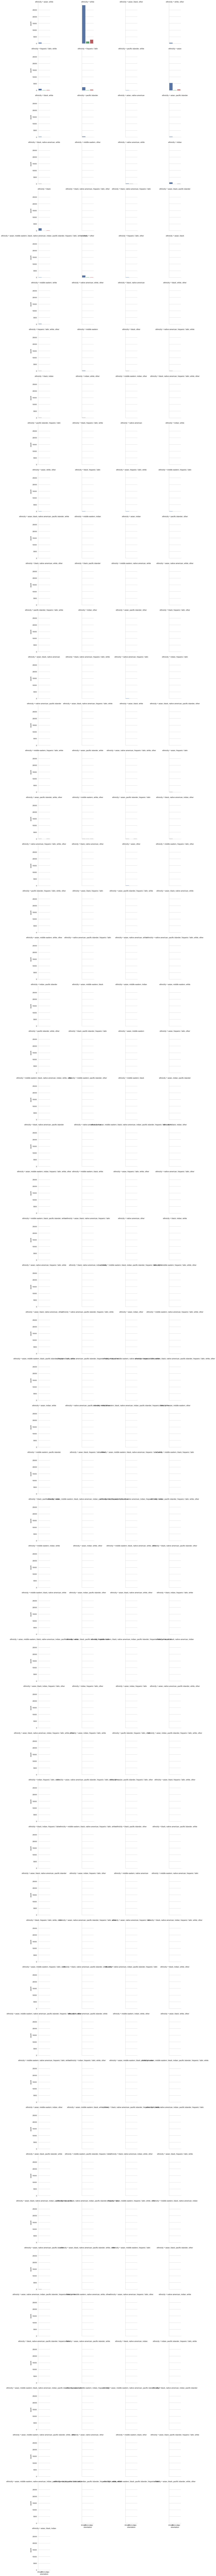

In [27]:
sns.factorplot(x='orientation',col='ethnicity',col_wrap=4,data=df,kind='count')

### A graph showing conection between somking and drinking habits

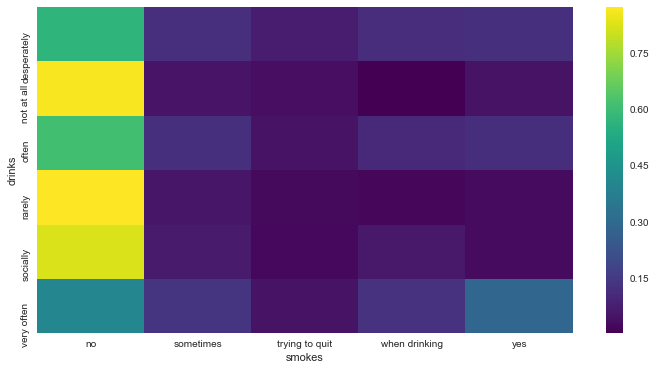

In [28]:
drinkSmoke =  df.groupby(by='drinks')['smokes'].value_counts(normalize=True).unstack()
# drinkSmoke = df.groupby(by=['drinks','smokes']).count()['age'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(drinkSmoke,cmap='viridis')

###  for part 2 I will try to look on diffrences between the two sexes in somefields
### we will expect diffrences in fields such as height age - lets see:

####  first lets see the distribution of sex in the data

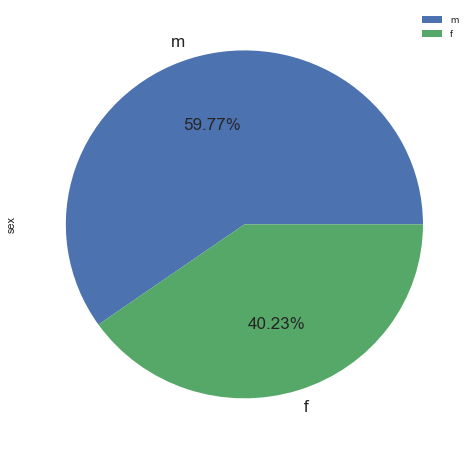

In [6]:
df["sex"].value_counts().plot.pie(figsize=(8, 8),legend=True,autopct='%.2f%%',fontsize=17)

#### lets split the data to the two sexes

In [7]:
sexes = list(df["sex"].unique())
df_sex = {}

for sex in sexes:
    df_sex[sex] = df[df["sex"] == sex]

####  Now lets investigate height distribution by sex, we can see that men are taller then women

C:\Users\davidna2\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


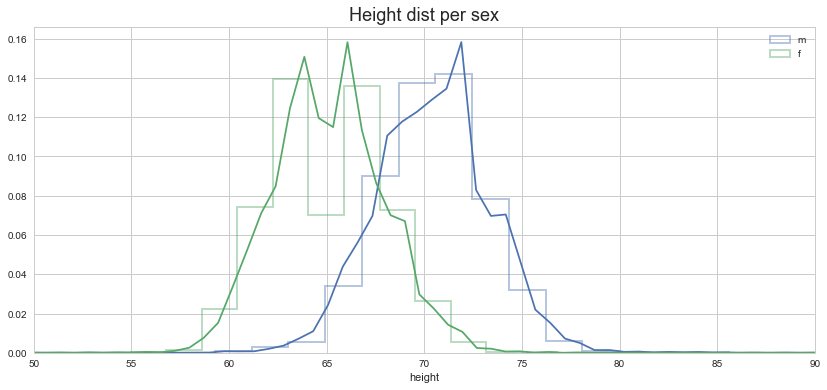

In [9]:
fig,ax = plt.subplots(figsize = (14, 6))
ax.set_title("Height dist per sex", fontsize = 18)
ax.set_xlim([50, 90])

for sex in sexes:
    sns.distplot(df_sex[sex]["height"].dropna(), hist_kws = {'histtype':'step',"linewidth":2})

ax.legend(sexes)

#### A little try with the violin plot

In [62]:
df.sort('height',ascending=False)['height'].head()

C:\Users\davidna2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


22358    95.0
33885    95.0
17949    95.0
55172    95.0
2569     95.0
Name: height, dtype: float64

In [ ]:
df_height_notNan= df[pd.notnull((df['height']))]

In [73]:
P = np.percentile(df_height_notNan.height, [5, 95])
new_df = df_height_notNan[(df_height_notNan.height > P[0]) & (df_height_notNan.height < P[1])]

In [78]:
age_map = {range(18,26):'18-25',range(26,36):'26-35',range(36,51):'36-50',range(51,66):'51-65',range(66,81):'66-80'
          ,range(81,111):'above 80'}
def map_age(age,age_map):
    for age_rng in age_map:
        if age in age_rng:
            return age_map[age_rng]
new_df['age_range'] = new_df['age'].apply(lambda age: map_age(age,age_map) )

C:\Users\davidna2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


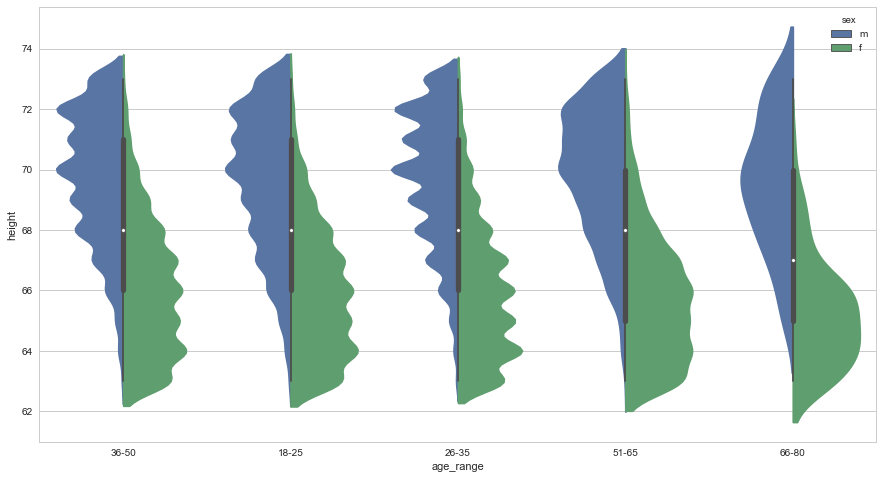

In [91]:
fig = plt.figure(figsize=(15,8))
sns.violinplot(x='age_range',y='height',hue='sex',split=True,data=new_df)
# plt.ylim(50, 100)


#### Now lets investigate the connection between drink/smoke/drugs habits

####  In order to investigate correlation we need to transfer our categories to numbers , and create a common scale to represent the degree of the habit. 

In [18]:
#0 - low
#1 - middle
#2 - high

drinks_map = {'not at all':0,'rarely':0,'socially':1,'often':1,'very often':2,'desperately':2}
drugs_map  = {'never':0,'sometimes':1,'often':2}
smokes_map = {'no':0,'trying to quit':1,'when drinking':1,'sometimes':1,'yes':2}

In [19]:
corrmat = {}

for sex in sexes:
    drink_smoke_habits = df_sex[sex][["drinks","smokes","drugs"]].dropna()
    drink_smoke_habits["drinks"] = drink_smoke_habits["drinks"].map(drinks_map)
    drink_smoke_habits["smokes"] = drink_smoke_habits["smokes"].map(smokes_map)
    drink_smoke_habits["drugs"]  = drink_smoke_habits["drugs"].map(drugs_map)
    corrmat[sex] = drink_smoke_habits.corr()

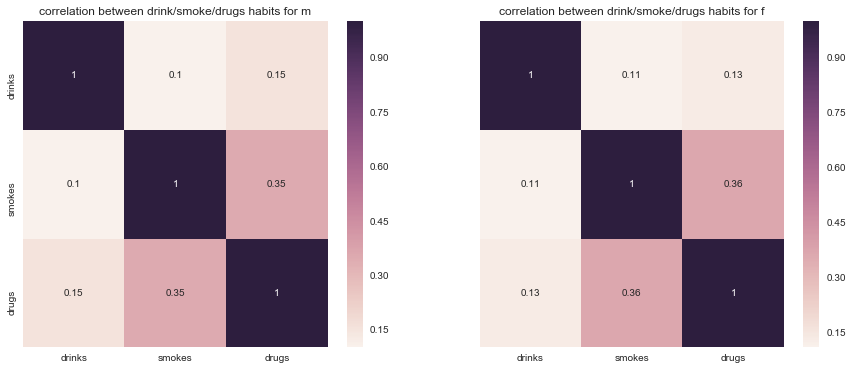

In [20]:
fig, (ax1, ax2) = plt.subplots(figsize = (15, 6), ncols = 2, sharey = True)
axes = dict(zip(sexes,[ax1, ax2]))

for sex in sexes:
    axes[sex].set_title("correlation between drink/smoke/drugs habits for " + sex)
    sns.heatmap(corrmat[sex], vmax = 1, annot = True, ax = axes[sex])

####  Using clustermap we can see that there is a stronger correlation between drugs and smoke then drink end each one of them. we can explain it by the some what similar nature of smoking and drugs

C:\Users\davidna2\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


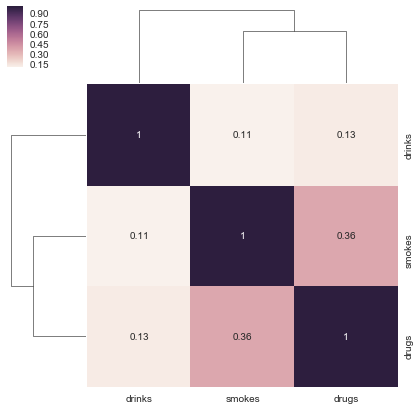

In [21]:
sns.clustermap(corrmat["f"], vmax = 1, annot = True, figsize = (7, 7))

In [12]:
body_types = list(df["body_type"].unique())
body_types

['a little extra',
 'average',
 'thin',
 'athletic',
 'fit',
 nan,
 'skinny',
 'curvy',
 'full figured',
 'jacked',
 'rather not say',
 'used up',
 'overweight']

####  We see that the body_type field is not orgnize in a rational acending order, so lets create an order list. 

In [31]:
body_types = ['skinny', 'thin', 'fit', 'average', 'athletic', 'curvy', 'a little extra', 'full figured', 'jacked', 
              'rather not say', 'used up', 'overweight']

df_bodytype = {}

for sex in sexes:
    df_bodytype[sex] = df_sex[sex]["body_type"].value_counts(normalize = True)


body_type_dist = pd.DataFrame(df_bodytype).reset_index("body_type")
body_type_dist.columns = ["body_type", "f", "m"]
body_type_dist.head()

,body_type,f,m
0,a little extra,0.038339,0.054399
1,athletic,0.107827,0.286136
2,average,0.262445,0.271754
3,curvy,0.177968,0.003400
4,fit,0.206921,0.249127


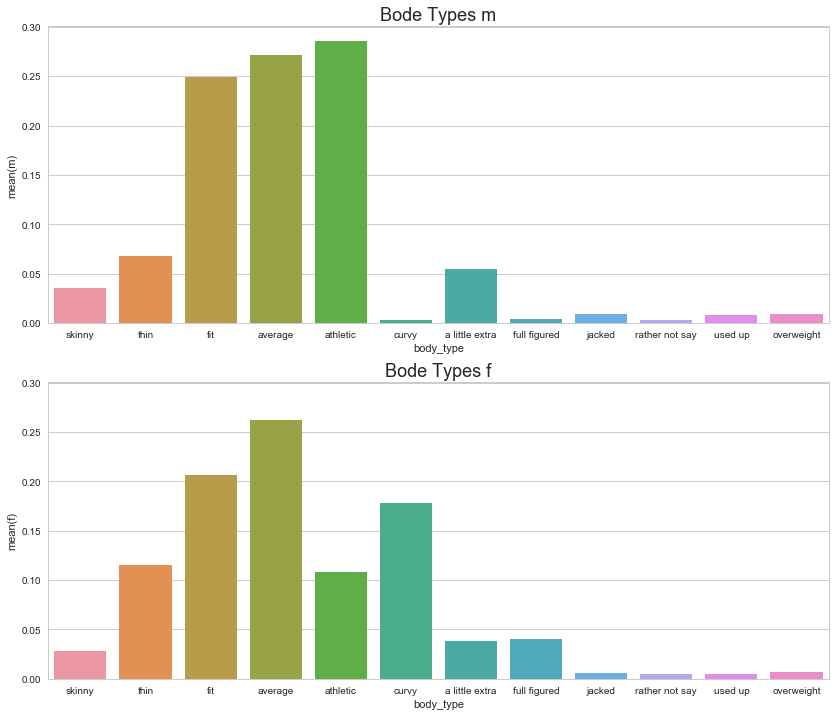

In [30]:
fig, (ax1, ax2) = plt.subplots(figsize = (14, 12), nrows = 2, sharey = True)
axes = dict(zip(sexes,[ax1, ax2]))

for sex in sexes:
    axes[sex].set_title("Body Types " + sex, fontsize = 18)
    sns.barplot(x = "body_type", y = sex, order = body_types, data = body_type_dist, ax = axes[sex])

####  Since the data was given by the user, it tells us more about how people thing of themselves then what they really are. so we see men use the 'athletic' even more 'average', and it list by  a bit, there are more women who rather don't say there body types